Summary Statistics:
                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3          AQI  
count   561.000000   561.000000  561.000000   561.000000  
mean    358.256364   420.988414   26.425062   358.256364  
std     227.359117   271.287026   36.563094   227.359117  
min      60.100000    69.080000    0.630000    60.100000  
25%     204.450000   240.900000    8.230000  

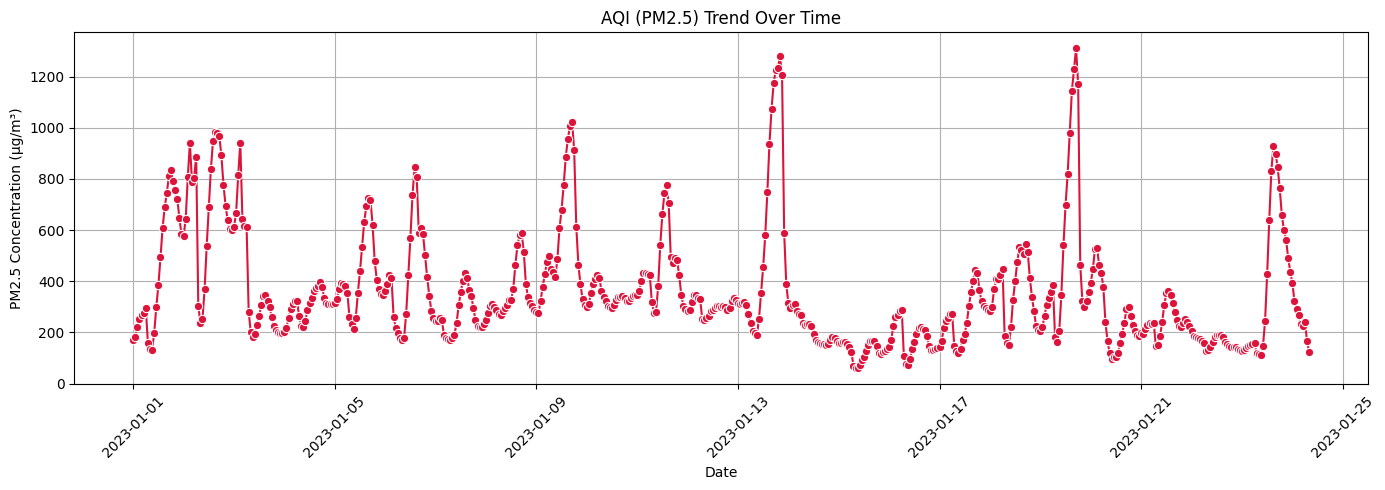

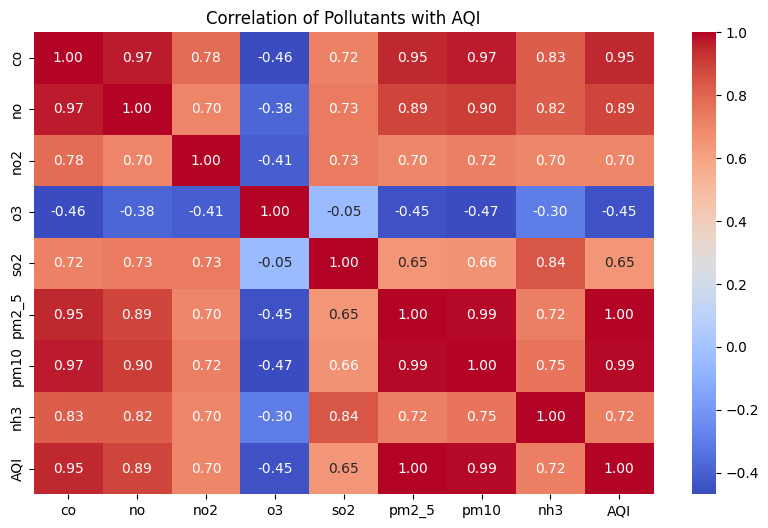

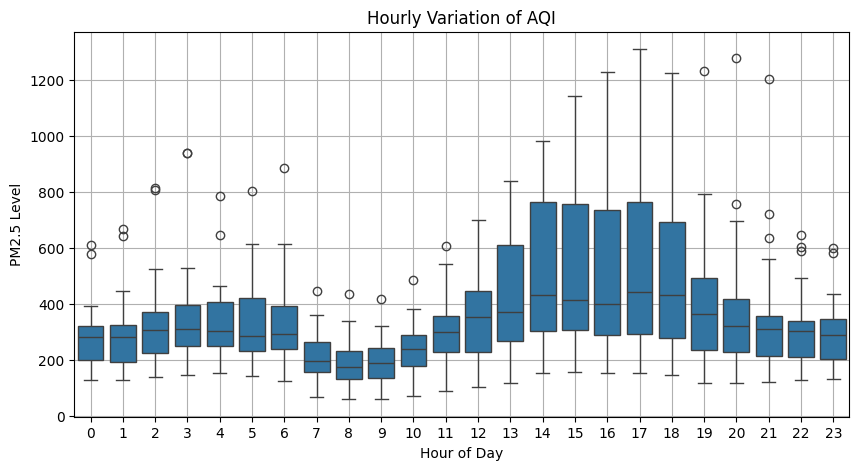

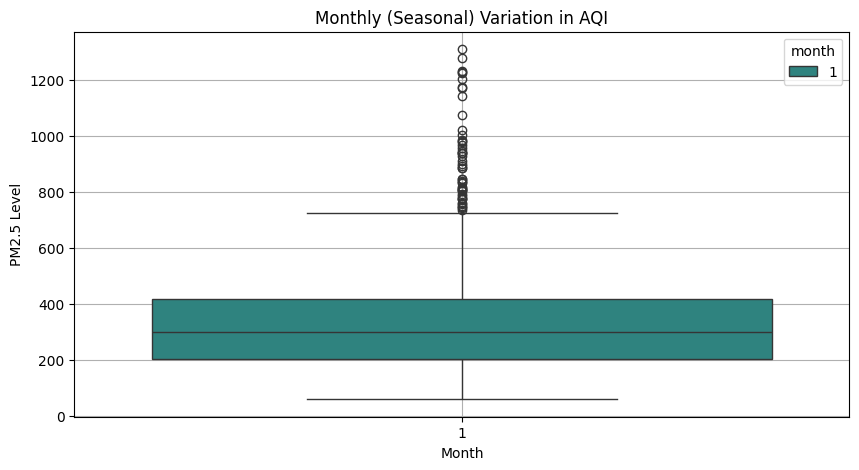

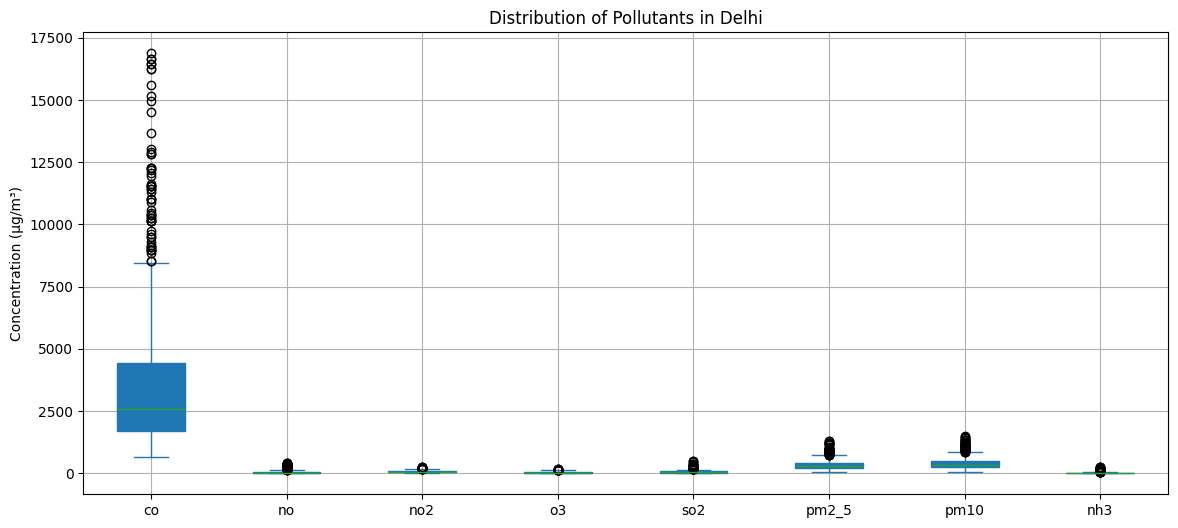


Pollutant-AQI Correlation Coefficients:
CO     -> Correlation with AQI: 0.95
NO     -> Correlation with AQI: 0.89
NO2    -> Correlation with AQI: 0.70
O3     -> Correlation with AQI: -0.45
SO2    -> Correlation with AQI: 0.65
PM2_5  -> Correlation with AQI: 1.00
PM10   -> Correlation with AQI: 0.99
NH3    -> Correlation with AQI: 0.72


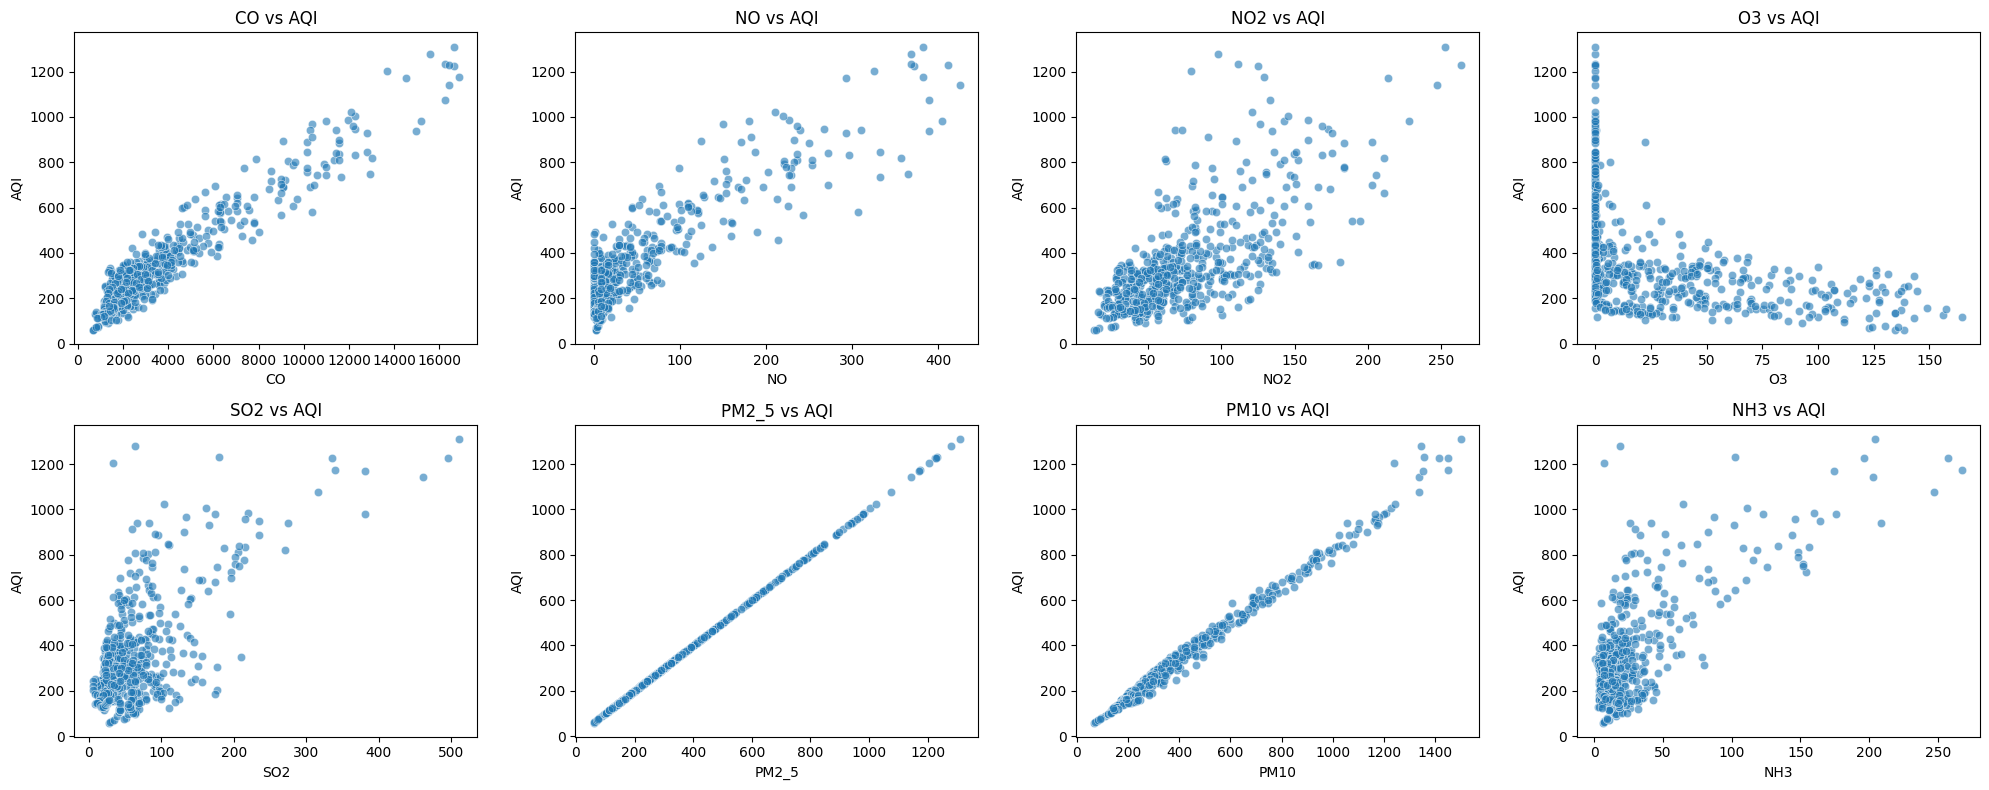

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 🌍 Load Dataset
df = pd.read_csv("AQI_data.csv")
df['date'] = pd.to_datetime(df['date'])

# 📅 Feature Extraction
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

# 📊 Treat PM2.5 as AQI proxy (if no official AQI column)
df['AQI'] = df['pm2_5']

# 🌫️ Pollutants to Analyze
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# --------------------------------------------
# 📌 1. Descriptive Statistics
# --------------------------------------------
print("Summary Statistics:")
print(df[pollutants + ['AQI']].describe())

# --------------------------------------------
# 📈 2. AQI Trend Over Time
# --------------------------------------------
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='date', y='AQI', marker='o', color='crimson')
plt.title("AQI (PM2.5) Trend Over Time")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 📊 3. Correlation Heatmap
# --------------------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df[pollutants + ['AQI']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Pollutants with AQI")
plt.show()

# --------------------------------------------
# 🕑 4. Hourly AQI Pattern
# --------------------------------------------
plt.figure(figsize=(10, 5))
# sns.boxplot(x='hour', y='AQI', data=df, palette="mako",legend="false")
sns.boxplot(x='hour', y='AQI', data=df)

plt.title("Hourly Variation of AQI")
plt.xlabel("Hour of Day")
plt.ylabel("PM2.5 Level")
plt.grid(True)
plt.show()

# --------------------------------------------
# 📆 5. Monthly/Seasonal AQI Variation
# --------------------------------------------
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='AQI', data=df, hue='month', palette='viridis')
plt.title("Monthly (Seasonal) Variation in AQI")
plt.xlabel("Month")
plt.ylabel("PM2.5 Level")
plt.grid(True)
plt.show()

# --------------------------------------------
# 📦 6. Pollutant Distribution
# --------------------------------------------
df[pollutants].plot(kind='box', figsize=(14, 6), patch_artist=True)
plt.title("Distribution of Pollutants in Delhi")
plt.ylabel("Concentration (µg/m³)")
plt.grid(True)
plt.show()

# --------------------------------------------
# 📈 7. Impact of Pollutants on AQI (Scatter + Correlation)
# --------------------------------------------
print("\nPollutant-AQI Correlation Coefficients:")
for pollutant in pollutants:
    corr, _ = pearsonr(df[pollutant], df['AQI'])
    print(f"{pollutant.upper():<6} -> Correlation with AQI: {corr:.2f}")

# Optional: Scatter plots
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.flatten()
for i, pollutant in enumerate(pollutants):
    sns.scatterplot(x=df[pollutant], y=df['AQI'], ax=axs[i], alpha=0.6)
    axs[i].set_title(f"{pollutant.upper()} vs AQI")
    axs[i].set_xlabel(pollutant.upper())
    axs[i].set_ylabel("AQI")
plt.tight_layout()
plt.show()

